In [82]:
from egreedy import EGreedy
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def moving_average(a, n=10, axis=None) :
    ret = np.cumsum(a, dtype=float, axis=axis)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

T = 1000
n = 150
d = 10
# means = np.random.random(size= (n, d))
means = np.zeros((n, d))
means[:, int(np.random.choice(d))] = 1

loc = np.tile(means, (T, 1, 1))


# dataset = np.random.binomial(choices, p)
dataset = np.random.normal(loc, 2)
def plot(epsilon):
    choices, rewards, _ = [np.stack(x) for x in zip(*EGreedy().train_loop(dataset, epsilon=epsilon))]
    rewards = rewards.mean(1)
    choices = choices.astype(int)
    chosen_means = means[np.tile(np.arange(n), T), choices.flatten()].reshape(T, n)
    # print(means)
    # print(choices)
    # print(chosen_means)
    # avg_reward = moving_average(rewards)
    # avg_choice = moving_average(choices)
    optimal_reward = means.max(1)
    # optimal_choice = means.argmax(1)
    # moving_optimal = moving_average(dataset, axis=0)
    # plt.plot(rewards)
    # plt.plot(moving_average(rewards))
    # plt.show()
    regret = np.mean(optimal_reward - chosen_means, axis=-1)
    avg_regret = moving_average(regret)
    plt.plot(regret)
    plt.plot(avg_regret)
    plt.grid(True)
    plt.show()

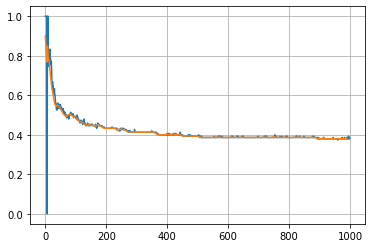

In [83]:
plot(.001)

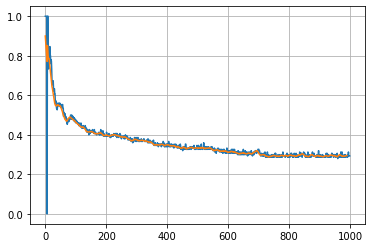

In [84]:
plot(.01)

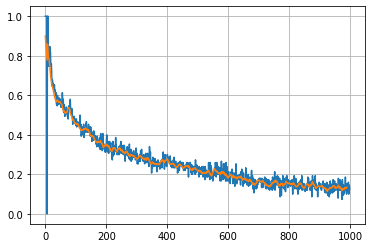

In [85]:
plot(.1)


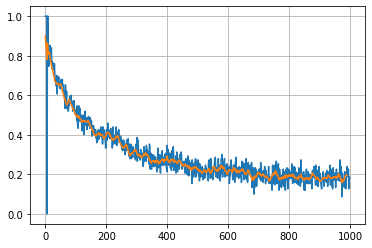

In [86]:
plot(.2)